<a href="https://colab.research.google.com/github/moira-du-monde/the_stag_hunt/blob/main/Coordination_games_labor_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Validation Procedure**

This notebook is part of a series documenting the empirical validation process for the paper "Coordination games and regional economic transitions" (under review).

Begin by installing and importing necessary libraries and dependencies.

In [ ]:
%%capture
pip install census

In [ ]:
%%capture
pip install us

In [ ]:
%%capture
pip install geopandas

In [ ]:
%%capture
pip install lehd

In [ ]:
%%capture
pip install statsmodels

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from census import Census
from us import states
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
with open('/content/drive/MyDrive/Defense/census_api_key.txt', "r") as f:
    c = Census(f.read().replace('\n', ''))

Retrieve and clean variables of interest from the 2009 and 2019 American Community Survey (ACS) 5-year estimates (a produce of the US Census).

The list of ACS variables is available here: https://api.census.gov/data/2019/acs/acs5/variables.html

Though this site is easier to navigate: https://censusreporter.org/topics/table-codes/

Pull data at the census tract level for housing vacancies and values, total population, and local poverty to income ratios for both 2007 and 2019.

In [ ]:
# B23025_005E unemployed
#'B01003_001E': total pop

trumbull14 = c.acs5.state_county_tract(fields = ('NAME', 'B23025_005E','B01003_001E','B08303_001E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "*",
                                      year = 2014)

mahoning14 = c.acs5.state_county_tract(fields = ('NAME','B23025_005E','B01003_001E','B08303_001E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '155',
                                      tract = "*",
                                      year = 2014)

mercer14 = c.acs5.state_county_tract(fields = ('NAME', 'B23025_005E','B01003_001E','B08303_001E'),
                                      state_fips = states.PA.fips,
                                      county_fips = '085',
                                      tract = "*",
                                      year = 2014)

In [ ]:
# B23025_005E unemployed
#'B01003_001E': total pop

trumbull19 = c.acs5.state_county_tract(fields = ('NAME', 'B23025_005E','B01003_001E','B08303_001E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '099',
                                      tract = "*",
                                      year = 2019)

mahoning19 = c.acs5.state_county_tract(fields = ('NAME','B23025_005E','B01003_001E','B08303_001E'),
                                      state_fips = states.OH.fips,
                                      county_fips = '155',
                                      tract = "*",
                                      year = 2019)

mercer19 = c.acs5.state_county_tract(fields = ('NAME', 'B23025_005E','B01003_001E','B08303_001E'),
                                      state_fips = states.PA.fips,
                                      county_fips = '085',
                                      tract = "*",
                                      year = 2019)

In [ ]:
trumbull_df_19 = pd.DataFrame(trumbull19)
mahoning_df_19 = pd.DataFrame(mahoning19)
mercer_df_19 = pd.DataFrame(mercer19)

trumbull_df_14 = pd.DataFrame(trumbull14)
mahoning_df_14 = pd.DataFrame(mahoning14)
mercer_df_14 = pd.DataFrame(mercer14)

counties19 = (trumbull_df_19, mahoning_df_19, mercer_df_19)

counties14 = (trumbull_df_14, mahoning_df_14, mercer_df_14)

dft_unemp_pop19 = pd.concat(counties19, ignore_index = True)
dft_unemp_pop19['year'] = 2019

dft_unemp_pop14 = pd.concat(counties14, ignore_index = True)
dft_unemp_pop14['year'] = 2014

dft_14_19 = (dft_unemp_pop19, dft_unemp_pop14)

dft_unemp_pop = pd.concat(dft_14_19, ignore_index = True)

dft_unemp_pop.head()

,NAME,B23025_005E,B01003_001E,B08303_001E,state,county,tract,year
0,"Census Tract 8129, Mahoning County, Ohio",111.0,4139.0,1831.0,39,099,812900,2019
1,"Census Tract 8117, Mahoning County, Ohio",123.0,2689.0,1245.0,39,099,811700,2019
2,"Census Tract 8118, Mahoning County, Ohio",20.0,1571.0,722.0,39,099,811800,2019
3,"Census Tract 8119.01, Mahoning County, Ohio",166.0,4507.0,2014.0,39,099,811901,2019
4,"Census Tract 8119.02, Mahoning County, Ohio",73.0,2962.0,1386.0,39,099,811902,2019


In [ ]:

dft_unemp_pop['rate'] = dft_unemp_pop['B23025_005E'] / dft_unemp_pop['B01003_001E']

dft_unemp_pop['pop'] = dft_unemp_pop['B01003_001E']

dft_unemp_pop['commute'] = dft_unemp_pop['B08303_001E'] / 100

dft_unemp_pop.tail()

,NAME,B23025_005E,B01003_001E,B08303_001E,state,county,tract,year,rate,pop,commute
305,"Census Tract 324, Mercer County, Pennsylvania",294.0,5927.0,2397.0,42,085,032400,2014,0.049604,5927.0,23.97
306,"Census Tract 326.02, Mercer County, Pennsylvania",109.0,4922.0,1503.0,42,085,032602,2014,0.022145,4922.0,15.03
307,"Census Tract 318, Mercer County, Pennsylvania",132.0,4920.0,2114.0,42,085,031800,2014,0.026829,4920.0,21.14
308,"Census Tract 319, Mercer County, Pennsylvania",81.0,4742.0,1803.0,42,085,031900,2014,0.017081,4742.0,18.03
309,"Census Tract 328, Mercer County, Pennsylvania",134.0,5999.0,2579.0,42,085,032800,2014,0.022337,5999.0,25.79


In [ ]:
unemp19 = dft_unemp_pop.loc[dft_unemp_pop['year'] == 2019]
unemp14 = dft_unemp_pop.loc[dft_unemp_pop['year'] == 2014]

unemp2019 = unemp19.pivot(index=['state','county','tract'], columns='year',values='rate')
unemp2019 = unemp2019.reset_index()
unemp2019['rate_2019'] = unemp2019[2019]

unemp2014 = unemp14.pivot(index=['state','county','tract'], columns='year',values='rate')
unemp2014 = unemp2014.reset_index()

unemp2014['rate_2014'] = unemp2014[2014]


# # comm2019 = unemp19.pivot(index=['state','county','tract'], columns='year',values='commute')

# # comm2014 = unemp14.pivot(index=['state','county','tract'], columns='year',values='commute')



unemp = pd.merge(unemp2019, unemp2014, how = 'inner', left_on=['state','county', 'tract'], right_on = ['state','county','tract'])

unemp['change_y'] = unemp['rate_2019'] - unemp['rate_2014']

unemp.head()

year,state,county,tract,2019,rate_2019,2014,rate_2014,change_y
0,39,099,800300,0.089161,0.089161,0.118736,0.118736,-0.029575
1,39,099,800400,0.060023,0.060023,0.072917,0.072917,-0.012894
2,39,099,800500,0.090234,0.090234,0.059393,0.059393,0.030841
3,39,099,800600,0.094448,0.094448,0.110749,0.110749,-0.016301
4,39,099,801000,0.045375,0.045375,0.076660,0.076660,-0.031285


In [ ]:
comm19 = dft_unemp_pop.loc[dft_unemp_pop['year'] == 2019]
comm14 = dft_unemp_pop.loc[dft_unemp_pop['year'] == 2014]

comm2019 = comm19.pivot(index=['state','county','tract'], columns='year',values='commute')
comm2019 = comm2019.reset_index()
comm2019['commute_2019'] = comm2019[2019]

comm2014 = comm14.pivot(index=['state','county','tract'], columns='year',values='commute')
comm2014 = comm2014.reset_index()

comm2014['commute_2014'] = comm2014[2014]


# # comm2019 = comm19.pivot(index=['state','county','tract'], columns='year',values='commute')

# # comm2014 = comm14.pivot(index=['state','county','tract'], columns='year',values='commute')



comm = pd.merge(comm2019, comm2014, how = 'inner', left_on=['state','county', 'tract'], right_on = ['state','county','tract'])

comm['change_X'] = (comm['commute_2019'] - comm['commute_2014']) 

comm.head()

year,state,county,tract,2019,commute_2019,2014,commute_2014,change_X
0,39,099,800300,4.60,4.60,3.38,3.38,1.22
1,39,099,800400,2.91,2.91,3.03,3.03,-0.12
2,39,099,800500,4.67,4.67,6.18,6.18,-1.51
3,39,099,800600,3.08,3.08,2.95,2.95,0.13
4,39,099,801000,4.18,4.18,3.79,3.79,0.39


In [ ]:
df = pd.merge(unemp, comm, how = 'inner', left_on=['state','county', 'tract'], right_on = ['state','county','tract'])

In [ ]:
#read in
oh_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_39_tract.zip")
pa_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_42_tract.zip")

#concat
oh_pa = (oh_tract, pa_tract)
oh_pa_con = pd.concat(oh_pa, ignore_index = True)

#filter 2019
geodf = pd.merge(df, oh_pa_con,  how='inner', left_on=['state','county', 'tract'], right_on = ['STATEFP','COUNTYFP','TRACTCE'])

#geodf = geodf[['state','county','tract','B01003_001E','year','rate','commute','GEOID','geometry']]

geodf = gpd.GeoDataFrame(geodf)

geodf.head()

In [ ]:
X = geodf['change_X'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = geodf['change_y'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

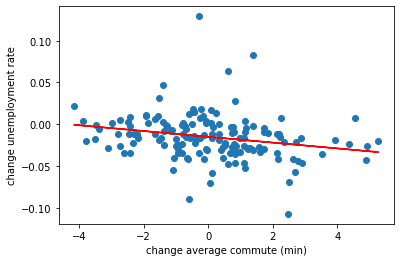

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('change average commute (min)')
plt.ylabel("change unemployment rate")
plt.show()

In [ ]:
linregress(x = geodf['change_X'], y = geodf['change_y'])

LinregressResult(slope=-0.00346933090066782, intercept=-0.015113633843697077, rvalue=-0.2386230647787021, pvalue=0.0027888325878108727, stderr=0.0011414503595041446, intercept_stderr=0.0020950612425027493)

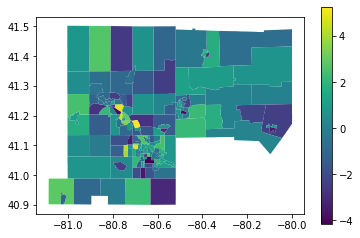

In [ ]:
# viz change in commute
geodf.plot(column='change_X', legend='True')

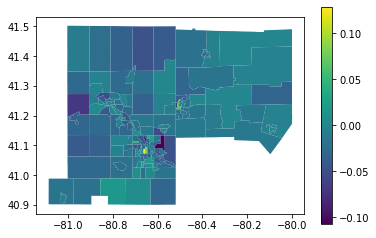

In [ ]:
# viz change in % unemp rate
geodf.plot(column='change_y', legend='True')

**GWR**

In [ ]:
#prep data continued (incl. standardizing variables)

geodf['centroid'] = geodf.centroid


g_y = geodf['change_y'].values.reshape((-1,1))
g_X = geodf[['change_X']].values

geodf["x"] = geodf.centroid.x
geodf["y"] = geodf.centroid.y

u = geodf["x"]
v = geodf["y"]
cs_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#calibrate MGWR

mgwr_selector = Sel_BW(cs_coords, g_y, g_X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[2])
print(mgwr_bw)
mgwr_results = MGWR(cs_coords, g_y, g_X, mgwr_selector).fit()

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[148. 154.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 155
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            146.174
Log-likelihood:                                                    -215.392
AIC:                                                                434.784
AICc:                                                               436.943
BIC:                                                               -625.470
R2:                                                                   0.057
Adj. R2:                                                              0.051

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [ ]:
#Prepare MGWR results for mapping

#Add MGWR parameters to GeoDataframe
geodf['mgwr_intercept'] = mgwr_results.params[:,0]
geodf['mgwr_jobs'] = mgwr_results.params[:,1]

#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(45,20))
ax0 = axes[0]
#ax0.set_title('GWR Intercept Surface (BW: ' + str(gwr_bw) +')', fontsize=40)
ax1 = axes[1]
#ax1.set_title('MGWR Intercept Surface (BW: ' + str(mgwr_bw[0]) +')', fontsize=40)

#Set color map
cmap = plt.cm.seismic

#Find min and max values of the two combined datasets
mgwr_min = geodf['mgwr_intercept'].min()
mgwr_max = geodf['mgwr_intercept'].max()

vmin = np.min([mgwr_min, mgwr_min])
vmax = np.max([mgwr_max, mgwr_max])

#If all values are negative use the negative half of the colormap
if (vmin < 0) & (vmax < 0):
    cmap = truncate_colormap(cmap, 0.0, 0.5)
#If all values are positive use the positive half of the colormap
elif (vmin > 0) & (vmax > 0):
    cmap = truncate_colormap(cmap, 0.5, 1.0)
#Otherwise, there are positive and negative values so the colormap so zero is the midpoint
else:
    cmap = shift_colormap(cmap, start=0.0, midpoint=1 - vmax/(vmax + abs(vmin)), stop=1.)

#Create scalar mappable for colorbar and stretch colormap across range of data values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))

#Plot MGWR parameters intercept
geodf.plot('mgwr_intercept', cmap=sm.cmap, ax=ax0, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    geodf[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax0, **{'edgecolor':'black'})

#Plot MGWR parameters
geodf.plot('mgwr_jobs', cmap=sm.cmap, ax=ax1, vmin=vmin, vmax=vmax, **{'edgecolor':'black', 'alpha':.65})
#If there are insignificnt parameters plot gray polygons over them
if (mgwr_filtered_t[:,0] == 0).any():
    geodf[mgwr_filtered_t[:,0] == 0].plot(color='lightgrey', ax=ax1, **{'edgecolor':'black'})
 
#Set figure options and plot 
fig.tight_layout()    
fig.subplots_adjust(right=0.9)
cax = fig.add_axes([0.92, 0.14, 0.03, 0.75])
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=50) 
ax0.get_xaxis().set_visible(False)
ax0.get_yaxis().set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
plt.show()

Text(0.5, 0, 'model coefficients')

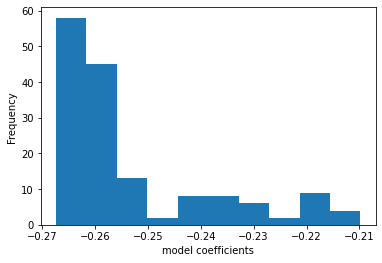

In [ ]:
geodf.mgwr_jobs.plot(kind = 'hist')
plt.xlabel('model coefficients')

Connect to the Longitudinal Employer-Household Dynamics (LEHD) databank via the lehd package.

https://github.com/jamaps/lehd

In [ ]:
wac_oh_17 = lehd.dl_lodes.wac(
    locations = ["39"],
    year = 2017,
    geography = "CT",
    type = 'JT00'
    )

wac_pa_17 = lehd.dl_lodes.wac(
    locations = ["42"],
    year = 2017,
    geography = "CT",
    type = 'JT00'
    )


Trying to download  oh_wac_S000_JT00_2017.csv.gz  from  https://lehd.ces.census.gov/data/lodes/LODES7/oh/wac/oh_wac_S000_JT00_2017.csv.gz  ......
Subsetting the data based on the input locations list ...
Finalizing the output ...
Trying to download  pa_wac_S000_JT00_2017.csv.gz  from  https://lehd.ces.census.gov/data/lodes/LODES7/pa/wac/pa_wac_S000_JT00_2017.csv.gz  ......
Subsetting the data based on the input locations list ...
Finalizing the output ...


In [ ]:
click = [wac_oh_17, wac_pa_17]

boom = pd.concat(click, ignore_index = True)

#C000 : total jobs; 


boom = boom [['w_geoid_CT', 'C000','CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10', 'CNS11','CNS12','CNS13','CNS14', 'CNS15', 'CNS16','CNS17','CNS18','CNS19','CNS20']]

boom.head()

,w_geoid_CT,C000,CNS01,CNS02,CNS03,CNS04,CNS05,CNS06,CNS07,CNS08,...,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20
0,39001770100,882,4,21,0,15,273,29,157,6,...,0,21,0,1,157,73,0,44,10,28
1,39001770200,760,1,11,0,32,6,160,94,4,...,8,2,0,2,162,145,0,6,8,21
2,39001770300,883,2,0,32,90,163,29,87,22,...,0,8,6,0,136,104,8,131,17,41
3,39001770400,2527,0,0,0,23,156,0,524,26,...,26,76,0,6,102,936,6,294,46,216
4,39001770500,73,0,0,0,15,19,0,23,0,...,0,0,0,0,0,2,2,0,7,5


In [ ]:
geo_jobs = pd.merge(geo_unemp, boom,  how='inner', left_on='GEOID', right_on = 'w_geoid_CT')

geo_jobs['label_y'] = geo_jobs['C000'] / geo_jobs['B01003_001E']

geo_jobs.head()

,state,county,tract,B01003_001E,change_X,year,geometry,GEOID,w_geoid_CT,C000,...,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,label_y
0,39,099,812900,4139.0,0.026818,2019,"POLYGON ((-81.00259 41.05381, -81.00236 41.062...",39099812900,39099812900,544,...,2,0,64,103,0,2,36,9,8,0.131433
1,39,099,812900,4232.0,0.054584,2014,"POLYGON ((-81.00259 41.05381, -81.00236 41.062...",39099812900,39099812900,544,...,2,0,64,103,0,2,36,9,8,0.128544
2,39,099,811700,2689.0,0.045742,2019,"POLYGON ((-80.67233 41.02780, -80.67232 41.029...",39099811700,39099811700,1109,...,86,3,313,46,86,0,266,52,0,0.412421
3,39,099,811700,2569.0,0.017906,2014,"POLYGON ((-80.67233 41.02780, -80.67232 41.029...",39099811700,39099811700,1109,...,86,3,313,46,86,0,266,52,0,0.431685
4,39,099,811800,1571.0,0.012731,2019,"POLYGON ((-80.66278 41.04648, -80.66241 41.046...",39099811800,39099811800,1409,...,6,0,596,66,251,0,48,37,0,0.896881


In [ ]:
geo_jobs = geo_jobs.loc[geo_jobs['year'] == 2019]

geo_jobs.head()

,state,county,tract,B01003_001E,change_X,year,geometry,GEOID,w_geoid_CT,C000,...,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,label_y
0,39,099,812900,4139.0,0.026818,2019,"POLYGON ((-81.00259 41.05381, -81.00236 41.062...",39099812900,39099812900,544,...,2,0,64,103,0,2,36,9,8,0.131433
2,39,099,811700,2689.0,0.045742,2019,"POLYGON ((-80.67233 41.02780, -80.67232 41.029...",39099811700,39099811700,1109,...,86,3,313,46,86,0,266,52,0,0.412421
4,39,099,811800,1571.0,0.012731,2019,"POLYGON ((-80.66278 41.04648, -80.66241 41.046...",39099811800,39099811800,1409,...,6,0,596,66,251,0,48,37,0,0.896881
6,39,099,811901,4507.0,0.036832,2019,"POLYGON ((-80.65774 41.03510, -80.65769 41.039...",39099811901,39099811901,3550,...,75,52,125,11,470,17,941,66,0,0.787664
8,39,099,811902,2962.0,0.024646,2019,"POLYGON ((-80.65499 41.02434, -80.65243 41.024...",39099811902,39099811902,5501,...,147,8,523,21,680,39,1184,83,24,1.857191


In [ ]:
industry = ['C000','CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10', 'CNS11','CNS12','CNS13','CNS14', 'CNS15', 'CNS16','CNS17','CNS18','CNS19','CNS20']

geo_jobs['construction'] = geo_jobs['CNS04'] / geo_jobs['C000']

geo_jobs['manufacturing'] = geo_jobs['CNS05'] / geo_jobs['C000']

geo_jobs['retail'] = geo_jobs['CNS07'] / geo_jobs['C000']

geo_jobs['healthcare'] = geo_jobs['CNS16'] / geo_jobs['C000']

geo_jobs['pub_admin'] = geo_jobs['CNS20'] / geo_jobs['C000']





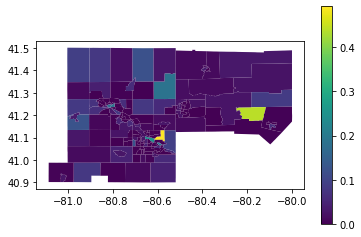

In [ ]:
geo_jobs.plot(column = 'pub_admin', legend = True)

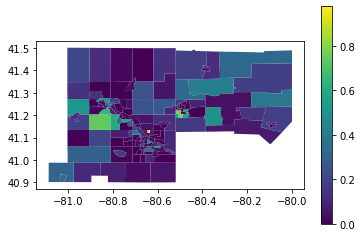

In [ ]:
geo_jobs.plot(column = 'manufacturing', legend = True)

Text(0.5, 0, 'model coefficients')

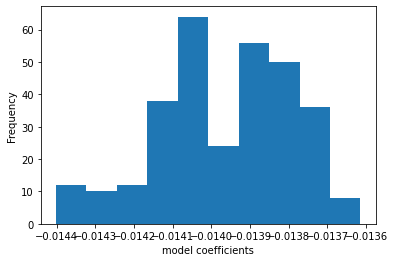

In [ ]:
#change MGWR coefficients
# geo_vava_0 = geo_vava.loc[geo_vava['change_X'] != 0]
geo_jobs.mgwr_jobs.plot(kind = 'hist')
plt.xlabel('model coefficients')

In [ ]:
X = geo_jobs['change_X'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = geo_jobs['healthcare'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X) 

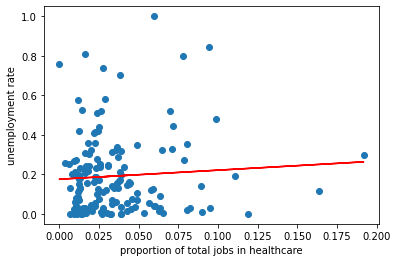

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('proportion of total jobs in healthcare')
plt.ylabel("unemployment rate")
plt.show()

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
#    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
#    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

regression_results(X,Y)

explained_variance:  -45.82
r2:  -75.9686
MAE:  0.1706
MSE:  0.0626
RMSE:  0.2502


In [ ]:
X = geo_jobs['change_X'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = geo_jobs['manufacturing'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

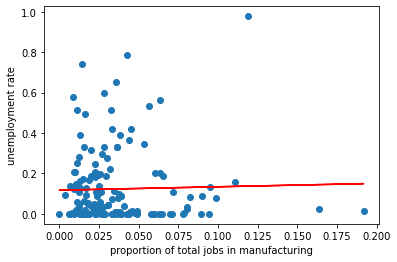

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('proportion of total jobs in manufacturing')
plt.ylabel("unemployment rate")
plt.show()

In [ ]:
X = geo_jobs['change_X'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = geo_jobs['pub_admin'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

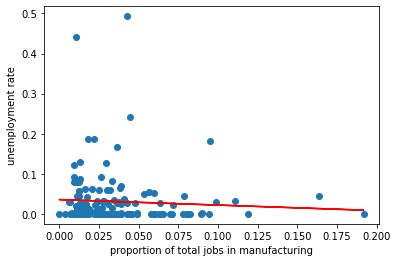

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('proportion of total jobs in manufacturing')
plt.ylabel("unemployment rate")
plt.show()

In [ ]:
regression_results(X,Y)

explained_variance:  -5.4988
r2:  -5.5174
MAE:  0.0434
MSE:  0.0053
RMSE:  0.0728
